In [53]:
import pickle
import importlib
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('../data/metadata/Nilerat_matplotlib_stylesheet.mplstyle')
import matplotlib_venn

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))  # Add the src directory to path 
import src.plots
import src.utils


# from scipy.stats import spearmanr, pearsonr, kendalltau, linregress
# from scipy.cluster import hierarchy
# from scipy.spatial.distance import squareform
# from scipy.cluster.hierarchy import dendrogram, fcluster, fclusterdata

# from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
# from sklearn.datasets import make_regression, make_classification
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.inspection import permutation_importance
# from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV, Lasso, Ridge, ElasticNet
# from sklearn.svm import SVR
# from sklearn.cross_decomposition import PLSRegression

# from sklearn.metrics import (
#     classification_report,
#     roc_auc_score, roc_curve, RocCurveDisplay, auc,
#     confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay,
#     f1_score, 
#     recall_score,
#     accuracy_score,
#     precision_score, precision_recall_curve, precision_recall_fscore_support,)
# from sklearn.model_selection import (
#     cross_val_score, cross_val_predict, cross_validate,
#     RepeatedKFold, RepeatedStratifiedKFold, 
#     StratifiedGroupKFold, GroupKFold, StratifiedKFold,
#     train_test_split, 
#     GridSearchCV,
#     LeaveOneGroupOut,)
# import sklearn
# from statsmodels.stats.multitest import fdrcorrection

# print(sklearn.__version__)

In [32]:
colors = json.load(open(r'..\data\metadata\color_schemes.json'))
compound_superclasses = json.load(open('../data/metadata/compound_superclasses.json', 'r'))
class_abbrevs = json.load(open('../data/metadata/molec_class_abbrev.json'))

data = pd.read_csv(r'../data/processed/combined_metabolites_data_with_model_params.csv').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

vldata = pd.read_csv('../data/processed/1700s_validation_lipids.csv', index_col=0)
vldata_cols = fg.loc[(fg['cohort'] == '30wk') & fg['has_ogtt']].index
qc_rep_1700s = fg.loc[fg['qc_rep']].index

In [35]:
vldata.loc[vldata['superclass'] == 'Sphingolipid'].sort_values('molec_class')

,RT,m/z,polarity,ID,molec_class,Features Found,1700s_extract_blank_rep1,1700s_extract_blank_rep2,1700s_extract_blank_rep3,1700s_QCdil_025,...,coef_female_ogtt,pval_female_ogtt,qval_all_ogtt,log_qval_all_ogtt,qval_sex,log_qval_sex,qval_male_ogtt,log_qval_male_ogtt,qval_female_ogtt,log_qval_female_ogtt
vl_4902,14.346,682.63696,-,Cer[AP] t18:0_24:0,Cer[AP],43,17.614403,18.644223,17.815906,18.687063,...,2.337635e-05,0.222327,0.474094,0.324135,1.033102e-02,1.985857,0.930225,0.031412,0.963560,0.016121
vl_4973,14.549,708.65216,-,Cer[NDS] d18:1_24:0,Cer[NDS],64,18.218760,18.977111,19.247608,21.954734,...,1.116429e-06,0.949067,0.815808,0.088412,1.148478e-01,0.939877,0.280187,0.552552,0.981151,0.008264
vl_4786,14.022,694.63647,-,Cer[NDS] d41:1,Cer[NDS],67,16.666199,16.907598,16.756226,21.227489,...,5.957626e-06,0.768998,0.662608,0.178743,6.956145e-02,1.157631,0.481239,0.317639,0.963560,0.016121
vl_4631,13.490,680.62061,-,Cer[NDS] d40:1,Cer[NDS],76,16.563190,18.241942,17.527824,20.622590,...,-1.008564e-05,0.585805,0.089650,1.047450,2.637308e-03,2.578839,0.915894,0.038155,0.963560,0.016121
vl_4768,13.971,666.64178,-,Cer[NP] t18:0_24:0,Cer[NP],68,22.191173,22.468768,22.301055,22.387159,...,1.434771e-05,0.264219,0.141740,0.848507,9.217875e-01,0.035369,0.180757,0.742905,0.963560,0.016121
vl_3013,9.682,554.51532,-,Cer[NP] t18:0_16:0,Cer[NP],76,17.440438,17.639638,17.577351,19.908433,...,-8.138900e-06,0.563651,0.230211,0.637873,3.555890e-01,0.449052,0.233779,0.631195,0.963560,0.016121
vl_4609,13.438,652.62579,-,Cer[NP] t18:0_23:0,Cer[NP],68,20.670333,21.061974,21.109813,21.840240,...,1.614041e-05,0.199867,0.045026,1.346534,4.835076e-01,0.315597,0.156817,0.804608,0.963560,0.016121
vl_4576,13.382,630.62421,+,Cer[NS] d18:1_24:1,Cer[NS],96,16.322863,16.629069,16.806996,21.166247,...,-2.129221e-06,0.929037,0.341044,0.467189,3.302366e-02,1.481175,0.690090,0.161094,0.976127,0.010494
vl_4657,13.576,810.68390,-,GlcCer[NDS] d42:1,GlcCer[NDS],78,16.107359,16.177723,16.220170,20.688980,...,2.672208e-06,0.881493,0.048622,1.313166,7.349796e-03,2.133725,0.090913,1.041373,0.967270,0.014452
vl_4656,13.575,812.70557,+,HexCer[NS] d42:1,HexCer[NS],64,17.136142,17.797922,18.061399,19.815391,...,-4.209317e-06,0.810429,0.023801,1.623397,5.295343e-03,2.276106,0.090913,1.041373,0.963560,0.016121


In [39]:
data.loc[data['superclass'] == 'Sphingolipid'].sort_values('molec_class')\
[['m/z', 'ID', 'fa_carbon:unsat', 'molec_class']]

,m/z,ID,fa_carbon:unsat,molec_class
i,,,,
l_598,708.65240,Cer[NS] d18:1_24:0,42:1,Cer[NS]
l_562,620.59955,Cer[NS] d18:1_22:0,40:1,Cer[NS]
l_555,646.61505,Cer[NS] d18:1_24:1,42:2,Cer[NS]
l_576,634.61493,Cer[NS] d41:1,41:1,Cer[NS]
l_570,829.71637,SM d43:1,43:1,SM
l_547,815.70062,SM d42:1,42:1,SM
l_536,801.68500,SM d41:1,41:1,SM
l_534,827.70142,SM d43:2,43:2,SM
l_525,787.66913,SM d40:1,40:1,SM


In [6]:
data.loc[(data['Type'] == 'metabolite') & (data['ID'] != 'Unidentified')]

,unique_id,ID,m/z,RT,molec_class,Type,polarity,lc_type,superclass,1091_8_FBG,...,log_qval_sampling,log_qval_ogtt,log_qval_sampling:ogtt,is_id,lipid_class,extra_lipid_label,fa_carbons,fa_unsat,fa_carbon:unsat,pval_asterisks
i,,,,,,,,,,,,,,,,,,,,,
m_2,Urocanic acid_11.365_139.0503,Urocanic acid,139.05028,11.365,Nitrogen heterocycle,metabolite,+,HILIC,Nitrogen heterocycle,24.180859,...,0.748819,0.233844,0.104163,True,NaN,NaN,NaN,NaN,NaN,ns
m_3,Uridine_7.513_243.0615,Uridine,243.06152,7.513,Nitrogen heterocycle,metabolite,-,HILIC,Nitrogen heterocycle,24.887680,...,9.482876,0.889251,0.159312,True,NaN,NaN,NaN,NaN,NaN,ns
m_4,Uric acid_12.732_167.0201,Uric acid,167.02007,12.732,Nitrogen heterocycle,metabolite,-,HILIC,Nitrogen heterocycle,27.518513,...,0.459055,1.250723,0.480416,True,NaN,NaN,NaN,NaN,NaN,ns
m_5,Tyrosine_11.137_180.0656,Tyrosine,180.06563,11.137,Amino acid,metabolite,-,HILIC,Amino acid,23.065294,...,2.977319,1.403552,0.104163,True,NaN,NaN,NaN,NaN,NaN,ns
m_6,Tryptophan_9.861_203.0817,Tryptophan,203.08170,9.861,Amino acid,metabolite,-,HILIC,Amino acid,22.586018,...,3.488614,0.752468,0.268424,True,NaN,NaN,NaN,NaN,NaN,ns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_133,3-Methylhistidine_11.492_170.0924,3-Methylhistidine,170.09239,11.492,Amino acid derivative,metabolite,+,HILIC,Amino acid derivative,20.736758,...,20.095417,0.868828,0.494541,True,NaN,NaN,NaN,NaN,NaN,ns
m_135,Indoxyl sulfate_8.177_212.0014,Indoxyl sulfate,212.00143,8.177,Organic acid,metabolite,-,HILIC,Organic acid,20.507605,...,1.286151,0.840874,0.921479,True,NaN,NaN,NaN,NaN,NaN,ns
m_136,3-Hydroxybutyric acid_9.527_103.0389,3-Hydroxybutyric acid,103.03895,9.527,Organic acid,metabolite,-,HILIC,Organic acid,26.065942,...,11.916771,0.272466,1.769866,True,NaN,NaN,NaN,NaN,NaN,*


In [31]:
srr = pd.read_excel('../data/external/SRR_table_2022.xlsx', index_col=0)

srr['P'] = srr['P'].str.replace('<', '').astype('float')
srr['P-FDR'] = srr['P-FDR'].str.replace('<', '').astype('float')

srr['pval_signif'] = srr['P'] < 0.05
srr['qval_signif'] = srr['P-FDR'] < 0.05

srr = srr.sort_values(['pval_signif', 'class', 'Compound', ], ascending=[False, True, True,])

# srr.to_excel('../data/external/SRR_table_cleaned.xlsx')

In [41]:
mvdf = pd.read_excel('../data/external/SRR_table_manual_validated.xlsx', index_col=0)

No.
12     False
17     False
18     False
19     False
133     True
       ...  
62     False
104    False
105    False
107    False
108    False
Name: is_lipid, Length: 381, dtype: bool

In [47]:
mvdf['is_lipid'] = mvdf['Compound'].apply(lambda x: ':' in x or 'Acylcarn' in x)
mvdf['is_lipid']

No.
12     False
17     False
18     False
19     False
133     True
       ...  
62     False
104    False
105    False
107    False
108    False
Name: is_lipid, Length: 381, dtype: bool

In [177]:
ids = data.loc[data['ID'] != 'Unidentified']
ids

,unique_id,ID,m/z,RT,molec_class,Type,polarity,lc_type,superclass,1091_8_FBG,...,log_qval_ogtt,log_qval_sampling:ogtt,is_id,lipid_class,extra_lipid_label,fa_carbons,fa_unsat,fa_carbon:unsat,pval_asterisks,shortID
i,,,,,,,,,,,,,,,,,,,,,
m_2,Urocanic acid_11.365_139.0503,Urocanic acid,139.05028,11.365,Nitrogen heterocycle,metabolite,+,HILIC,Nitrogen heterocycle,24.180859,...,0.233844,0.104163,True,NaN,NaN,NaN,NaN,NaN,ns,NaN
m_3,Uridine_7.513_243.0615,Uridine,243.06152,7.513,Nitrogen heterocycle,metabolite,-,HILIC,Nitrogen heterocycle,24.887680,...,0.889251,0.159312,True,NaN,NaN,NaN,NaN,NaN,ns,NaN
m_4,Uric acid_12.732_167.0201,Uric acid,167.02007,12.732,Nitrogen heterocycle,metabolite,-,HILIC,Nitrogen heterocycle,27.518513,...,1.250723,0.480416,True,NaN,NaN,NaN,NaN,NaN,ns,NaN
m_5,Tyrosine_11.137_180.0656,Tyrosine,180.06563,11.137,Amino acid,metabolite,-,HILIC,Amino acid,23.065294,...,1.403552,0.104163,True,NaN,NaN,NaN,NaN,NaN,ns,NaN
m_6,Tryptophan_9.861_203.0817,Tryptophan,203.08170,9.861,Amino acid,metabolite,-,HILIC,Amino acid,22.586018,...,0.752468,0.268424,True,NaN,NaN,NaN,NaN,NaN,ns,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l_905,TG 57:2_19.582_946.8804,TG 57:2,946.88043,19.582,TG,lipid,+,RP,Glycerolipid,17.004938,...,1.120067,1.148267,True,TG,NaN,57.0,2.0,57:2,ns,TG 57:2
l_907,TG 56:1_19.841_934.8812,TG 56:1,934.88123,19.841,TG,lipid,+,RP,Glycerolipid,18.240675,...,1.411885,1.871573,True,TG,NaN,56.0,1.0,56:1,*,TG 56:1
l_908,TG 18:2_18:1_24:0_19.865_986.9119,TG 18:2_18:1_24:0,986.91193,19.865,TG,lipid,+,RP,Glycerolipid,16.658568,...,1.811379,1.632959,True,TG,NaN,60.0,3.0,60:3,*,TG 60:3


In [178]:
importlib.reload(src.utils)

data['shortID']     = data['molec_class'] + ' ' +   data['fa_carbon:unsat']
vldata['shortID'] = vldata['molec_class'] + ' ' + vldata['fa_carbon:unsat']

mvdf['auto_orig_i'] = np.nan
mvdf['auto_vali_i'] = np.nan

origs = []
valis = []

for i, row in mvdf.iterrows():
    orig_matches = data.loc[data['shortID'] == row['Compound']].index.to_list()
    origs.append(orig_matches)

        
    vali_matches = vldata.loc[vldata['shortID'] == row['Compound']].index.to_list()
    valis.append(vali_matches)

mvdf['auto_i'] = origs
mvdf['auto_vi'] = valis

mvdf['auto_i'] = mvdf['auto_i'].replace([], np.nan)
mvdf['auto_vi'] = mvdf['auto_vi'].replace([], np.nan)

mvdf.to_excel('../data/external/SRR_table_manual_validated_and_auto_matched.xlsx')

In [179]:
mvdf

,Compound,i,vi,HMDB/ChEBI ID,N,SRR (95% CI),P,P-FDR,I2,tau2,class,pval_signif,qval_signif,is_lipid,auto_orig_i,auto_vali_i,auto_i,auto_vi
No.,,,,,,,,,,,,,,,,,,
12,3-(4-hydroxyphenyl)lactate,NaN,NaN,HMDB00755,2,1.35 (1.01; 1.81),0.046,0.119,67,0.030,AAA metabolism,True,False,False,NaN,NaN,[],[]
17,Hydrocinnamate,m_61,NaN,HMDB00764,3,0.86 (0.80; 0.93),0.001,0.001,0,0.000,AAA metabolism,True,True,False,NaN,NaN,[],[]
18,Phenylalanine,m_26,NaN,HMDB00159,18,1.30 (1.16; 1.45),0.001,0.001,87,0.044,AAA metabolism,True,True,False,NaN,NaN,[],[]
19,Tyrosine,m_5,NaN,HMDB00158,18,1.35 (1.22; 1.49),0.001,0.001,81,0.031,AAA metabolism,True,True,False,NaN,NaN,[],[]
133,Acylcarnitine C10:1,NaN,NaN,CHEBI:86063,2,0.88 (0.78; 0.98),0.021,0.066,0,0.000,Acylcarnitine metabolism,True,False,True,NaN,NaN,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Tryptophan,m_6,NaN,HMDB00929,14,1.14 (0.99; 1.30),0.065,0.153,88,0.054,Tryptophan Metabolism,False,False,False,NaN,NaN,[],[]
104,γ-tocopherol,NaN,NaN,HMDB01492,2,0.87 (0.73; 1.04),0.139,0.267,0,0.000,Ubiquinone and other terpenoid-quinone biosynt...,False,False,False,NaN,NaN,[],[]
105,2-hydroxyhippurate,NaN,NaN,HMDB00840,2,1.08 (0.89; 1.30),0.433,0.571,44,0.009,"Xenobiotics, food components",False,False,False,NaN,NaN,[],[]


In [129]:
# Metabs found with Elastic net importance > 0.02 and qval < 0.05
fed_venn_overlap = ['l_109', 'l_123', 'l_142', 'l_146', 'l_164', 'l_166', 'l_175',
      'l_186', 'l_195', 'l_240', 'l_298', 'l_301', 'l_326', 'l_343',
      'l_356', 'l_384', 'l_388', 'l_391', 'l_424', 'l_433', 'l_435',
      'l_437', 'l_444', 'l_445', 'l_463', 'l_469', 'l_496', 'l_503', 
      'l_505', 'l_569', 'l_582', 'l_603', 'l_611', 'l_613', 'l_617', 
      'l_623', 'l_628', 'l_632', 'l_644', 'l_648', 'l_653', 'l_663',
      'l_665', 'l_680', 'l_694', 'l_706', 
      'l_716', 'l_747', 'l_794', 'l_797', 'l_835', 'l_841', 'l_844', 
      'l_873', 'l_895', 'l_912', 'm_128', 'm_144', 'm_25', 'm_27', 
      'm_37', 'm_38', 'm_58', 'm_78', 'm_80', 'm_95', 'm_97']
print(fed_venn_overlap)

['l_109', 'l_123', 'l_142', 'l_146', 'l_164', 'l_166', 'l_175', 'l_186', 'l_195', 'l_240', 'l_298', 'l_301', 'l_326', 'l_343', 'l_356', 'l_384', 'l_388', 'l_391', 'l_424', 'l_433', 'l_435', 'l_437', 'l_444', 'l_445', 'l_463', 'l_469', 'l_496', 'l_503', 'l_505', 'l_569', 'l_582', 'l_603', 'l_611', 'l_613', 'l_617', 'l_623', 'l_628', 'l_632', 'l_644', 'l_648', 'l_653', 'l_663', 'l_665', 'l_680', 'l_694', 'l_706', 'l_716', 'l_747', 'l_794', 'l_797', 'l_835', 'l_841', 'l_844', 'l_873', 'l_895', 'l_912', 'm_128', 'm_144', 'm_25', 'm_27', 'm_37', 'm_38', 'm_58', 'm_78', 'm_80', 'm_95', 'm_97']


In [130]:
signif_set = set()

not_signif_set = set()

def add_to_set(entry, set_):
    try: 
        [set_.add(x) for x in entry]
    except:
        pass

mvdf.loc[mvdf['pval_signif'], 'i'].str.split(';').apply(lambda x: add_to_set(x, signif_set))
mvdf.loc[mvdf['pval_signif'], 'auto_i'].str.split(';').apply(lambda x: add_to_set(x, signif_set))

mvdf.loc[~mvdf['pval_signif'], 'i'].str.split(';').apply(lambda x: add_to_set(x, not_signif_set))
mvdf.loc[~mvdf['pval_signif'], 'auto_i'].str.split(';').apply(lambda x: add_to_set(x, not_signif_set))

No.
13     None
14     None
15     None
16     None
109    None
       ... 
62     None
104    None
105    None
107    None
108    None
Name: auto_i, Length: 223, dtype: object

In [172]:
# List of metabs and lipids found in the venn diagram Non-fasted overlap region
#     And  found to be significant in SRR in humans.
rat_hum = data.loc[signif_set.intersection(set(fed_venn_overlap)), 'ID'].index
rat_hum

Index(['m_58', 'm_78', 'l_873', 'l_797', 'm_97', 'l_424', 'l_653', 'l_195',
       'l_469', 'l_835', 'l_384', 'l_503', 'l_794'],
      dtype='object', name='i')

In [173]:
# List of metabs and lipids found in the venn diagram Non-fasted overlap region
#     But NOT  found to be significant in SRR in humans.
rat_not_hum = data.loc[not_signif_set.intersection(set(fed_venn_overlap)), 'ID'].index
rat_not_hum

Index(['l_632', 'm_95', 'l_644', 'l_617', 'l_326', 'l_628', 'l_665', 'l_613'], dtype='object', name='i')

In [185]:
rat_hum

Index(['m_58', 'm_78', 'l_873', 'l_797', 'm_97', 'l_424', 'l_653', 'l_195',
       'l_469', 'l_835', 'l_384', 'l_503', 'l_794'],
      dtype='object', name='i')

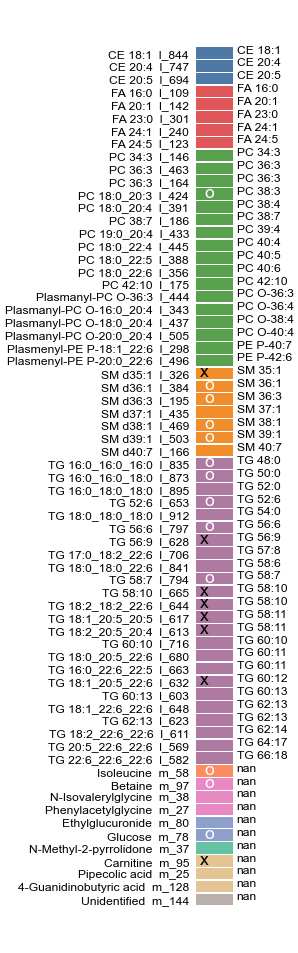

In [192]:
bdf = data.loc[fed_venn_overlap].sort_values(['Type', 'molec_class', 'fa_carbons', 'fa_unsat'],
                                     ascending=[False, False, False, False])

bdf['IDshort'] = bdf['molec_class'].map(class_abbrevs) + ' ' + bdf['fa_carbon:unsat']
bdf['IDshort'] = bdf['IDshort'].str.replace('- ', '-')
# bdf.loc[bdf['Type'] == 'lipid', 'ID'] = bdf.loc[bdf['Type'] == 'lipid', 'IDshort']

fig, ax = plt.subplots(figsize=(0.2, 5), dpi=250)
for i, (feature, row) in enumerate(bdf.iterrows()):
    ax.barh([i], [1], height=0.9, color=colors[row['molec_class']])
    
    if feature in rat_hum:
        ax.text(0.5, i+0.1, 'o', color='white', va='center', ha='right', fontsize=5)
    if feature in rat_not_hum:
        ax.text(0.1, i+0.1, 'x', color='black', va='center', ha='left', fontsize=5)
    ax.text(1.1, i, row['IDshort'], ha='left', fontsize=3.5)
    
ax.set_xticks([])
ax.set_yticks(range(len(bdf)),  bdf['ID']  + '  ' + bdf.index + ' ', rotation=0, ha='right')
ax.tick_params(length=0, pad=1, labelsize=3.5)
sns.despine(left=True, bottom=True)
# plt.savefig('../reports/figures/Figure5/Both_models_IDs.pdf', bbox_inches='tight', dpi=300)